In [64]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
_pth= "CELO-Price&MarketCap-OneYear-TokenInsight.xlsx"

In [10]:
raw_dat = pd.read_excel(_pth, sheet_name="SheetJS",parse_dates=["Time"])

In [11]:
raw_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       366 non-null    object        
 1   Symbol     366 non-null    object        
 2   Time       366 non-null    datetime64[ns]
 3   Price      366 non-null    float64       
 4   MarketCap  366 non-null    float64       
 5   Returns    0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 17.3+ KB


In [208]:
def compute_log_returns(prices, shift_n):
    """
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    """
    # Shift the prices by one day 
    shifted_prices = prices.shift(shift_n)
    
    # Calculate the log returns 
    log_returns = np.log(prices/shifted_prices)
    log_returns['weekday']=log_returns.index.to_frame().apply(lambda x :x[0].strftime('%A'), axis=1)
    return log_returns

In [209]:
celo_data = raw_dat.set_index('Time')[['Price']]

In [230]:
celo_ret7 =compute_log_returns(celo_data, 7)
celo_ret5 =compute_log_returns(celo_data, 5)
celo_ret3 =compute_log_returns(celo_data, 3)
celo_ret2 =compute_log_returns(celo_data, 2)
celo_ret1 =compute_log_returns(celo_data, 1)

In [231]:
{x.weekday():x.strftime('%A') for x in celo_ret5.index[:7]}

{3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday',
 0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday'}

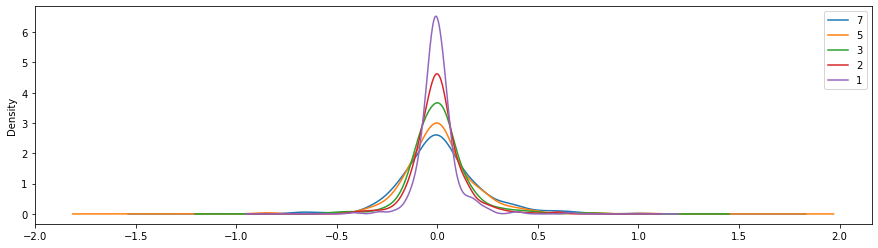

In [234]:
fig, ax = plt.subplots(figsize=(15,4))
celo_ret7.plot.kde(ax=ax)
celo_ret5.plot.kde(ax=ax)
celo_ret3.plot.kde(ax=ax)
celo_ret2.plot.kde(ax=ax)
celo_ret1.plot.kde(ax=ax)
ax.legend(['7','5','3','2','1'])

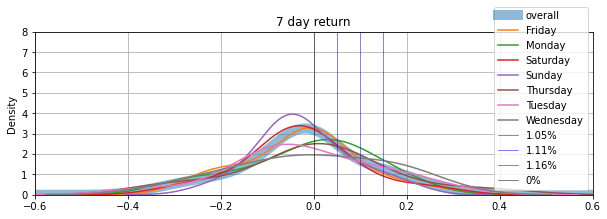

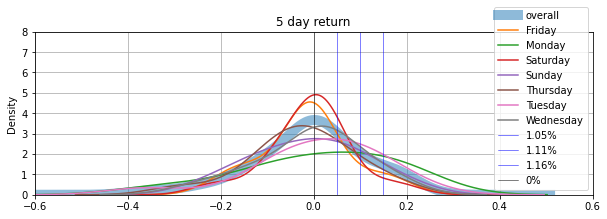

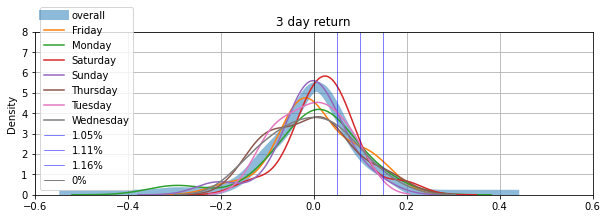

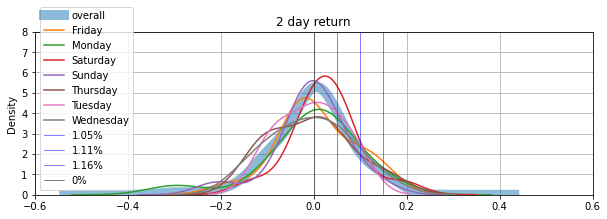

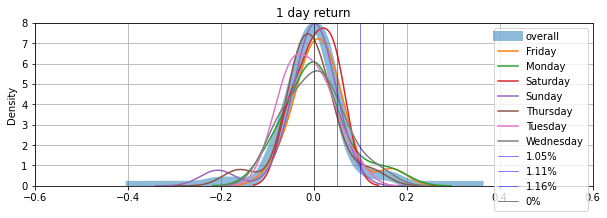

In [246]:
def plot_returns_oct(data,ret_ticks=[0.05,0.1,0.15], title="7 day return"):
    _, ax = plt.subplots(figsize=(10,3))
    data["2021-10-01":]['Price'].plot(kind='kde', legend=True, ax=ax, label='overall', linewidth=10, alpha=0.5)
    data["2021-10-01":].groupby(['weekday'])['Price'].plot(kind='kde', legend=True, ax=ax, grid=True, title=title)
    [ax.axvline(x=_t, color='b', linewidth=0.5, label=f'{np.exp(_t):2.2f}%') for _t in ret_ticks]
    ax.axvline(x=0.0, color='k', linewidth=0.5, label='0%')
    ax.set_xlim(-0.6,0.6)
    ax.set_ylim(0,8)
    plt.legend()
    plt.show()

plot_returns_oct(celo_ret7, title="7 day return")
plot_returns_oct(celo_ret5, title="5 day return")
plot_returns_oct(celo_ret2, title="3 day return")
plot_returns_oct(celo_ret2, title="2 day return")
plot_returns_oct(celo_ret1, title="1 day return")

In [245]:
# buy on friday, how much it changes w/ Saturday, Sunday, Monday
# is 10% growth over 1 week happen by chance?
# what is the average 7day-return over history?
# Is there a change in 7day-return after october21?